### LSTM

- RNN 에서의 단점인 오래된 단어 정보에 대하여 희미해 지는 문제를  완화 시킨다.
- GRU 보다 LSTM 더 우수하지만 복잡하다 (GRU : RNN의 간단한 버전)
- **Gate** 를 이용한다

<img src="https://img.notionusercontent.com/s3/prod-files-secure%2Fe8f11927-b70c-4524-9227-a3efac08e7aa%2Fd095f1c5-2b1e-4fd0-8194-982ed7049724%2FUntitled.png/size/w=2000?exp=1729411327&sig=7K_7dOOPtALQiJx8rjTPoKzm-0_FO8pQ5bFo_80Ja8o" width="500">

### 기억 셀 ($C_t$)

- 오래된 단어를 보다 잘 기억
- 게이트가 이 역할을 한다.
- **기억 셀은 하나의 벡터!**
- 차원 수 : hidden state의 원소 = $c_t$ 벡터의 원소 = LSTM 층의 은닉 노드의 수

### 기억 셀의 업데이트

- 이전 정보를 삭제(기억) 하거나 , 새로운 정보를 추가
- 필요 없는 정보를 잊어 버리고 중요한 정보를 추가한다.
- 종류 : forget, input, output 게이트가 있다.
- 역할 : **$c_{t-1}$  을 새로** 업데이트 하여 **$c_t$ 계산**
    - 이후 $c_t$, 단어 임베딩 벡터 $t$, $h_{t-1}$ 을 이용하여 $h_t$  를 계산하고 다음층으로 넘긴다.

### 기억 셀(Memory Cell)

- 오래된 내용을 보다 더 잘 기억한다
- 3 개의 게이트( input, forget, output)

### Gate

<img src="https://img.notionusercontent.com/s3/prod-files-secure%2Fe8f11927-b70c-4524-9227-a3efac08e7aa%2F2e55fde0-4ecf-49be-aab6-6325e7b4b706%2FUntitled.png/size/w=2000?exp=1729412028&sig=uz0PK93eT_CLiiP2mK69BXTWET3CjL_rDcBlzjVwb3w" width=600/>

- **Forget Gate**
    - **$f_{t} = \sigma (W_{x_f} \cdot x_t + W_{h_f} \cdot h_{t-1} + b_f)$**
    1. Sigmoid : 0 에서 1 사이로 반환 (이전 내용을 얼마나 기억할 것인지)
        - 1에 가까울 수록 더 기억을 한다.
    2. forget gate의 출력 값: ${c_{t-1}}' = f_t \odot c_{t-1}$

- **Input Gate**
    - **$i_{t} = \sigma (W_{x_i} \cdot x_t + W_{h_i} \cdot h_{t-1} + b_i)$**
    - **$g_t = \tanh (W_{x_g} \cdot x_t + W_{h_g} \cdot h_{t-1} + b_g)$**

- **Cell State(Memory cell : 기억 셀) Update**
    - **$c_t = f_t \odot c_{t-1} + i_t \odot g_t \\ c_t = {c_{t-1}}' + i_t \odot g_t$**

- **Output Gate**
    - $o_{t} = \sigma (W_{x_o} \cdot x_t + W_{h_o} \cdot h_{t-1} + b_o)$
    - $h_t = o_t \odot \tanh(c_t)$

### GRU(Gated Recurrent Unit)

<img src="https://img.notionusercontent.com/s3/prod-files-secure%2Fe8f11927-b70c-4524-9227-a3efac08e7aa%2Fb172a50c-f22b-47d0-a5f8-2ba26d8323dd%2FUntitled.png/size/w=2000?exp=1729412079&sig=Vc95XErtv0Te5MKOpjJyDfe2uyEUis0noheVRQ1sqbw" width=600/>

- 게이트(reset, update), $h_t$ 업데이트
- 기억 셀 이 없다.
- LSTM 과 RNN 의 사이 (LSTM 보다 빠르고, 정확도는 안 좋다)


### imdb 실습

In [1]:
from tensorflow.keras.datasets import imdb
max_features = 20000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
        
from tensorflow.keras.preprocessing import sequence
max_len = 400
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
        
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

2024-10-20 17:04:32.644462: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 17:04:32.746696: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-20 17:04:32.775928: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-20 17:04:32.969450: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-20 17:04:34.118343: W tensorflow/compiler/tf2

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5570 - loss: 0.6817 - val_accuracy: 0.7952 - val_loss: 0.4655
Epoch 2/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8133 - loss: 0.4260 - val_accuracy: 0.8584 - val_loss: 0.3442
Epoch 3/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8723 - loss: 0.3175 - val_accuracy: 0.8328 - val_loss: 0.4200
Epoch 4/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8968 - loss: 0.2637 - val_accuracy: 0.8864 - val_loss: 0.2900
Epoch 5/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9058 - loss: 0.2382 - val_accuracy: 0.8912 - val_loss: 0.2884


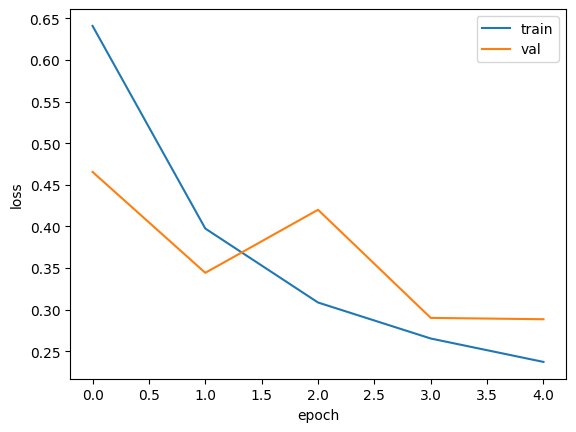

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models
        
model = models.Sequential()
model.add(layers.Embedding(max_features, 64))
model.add(layers.LSTM(32))
        
################## lstm ######################################
# 8320 = (3232   +  3232       +32)  *  4
################## lstm ######################################
        
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()
        
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
        
history = model.fit(x_train, y_train_one_hot, epochs=5, batch_size=128, validation_split=0.1)
        
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

### bidirectional 및 stacked bidirectional

- bi direct
    ```py
    model = models.Sequential()
    model.add(layers.Embedding(max_features, 128, input_length=maxlen))
    model.add(layers.Bidirectional(layers.LSTM(64)))
    model.add(layers.Dense(2, activation = 'softmax'))
    ```
- stacked bi direct : `return_sequences=True` 로 설정
    ```py
    model1 = models.Sequential()
    model1.add(layers.Embedding(max_features, 128, input_length=maxlen))
    model1.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True)))
    model1.add(layers.Bidirectional(layers.LSTM(64)))
    model1.add(layers.Dense(2, activation = 'softmax'))
    ```

In [ ]:
import numpy as np
from tensorflow import keras

max_features = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=max_features)
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [ ]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 128, input_length=maxlen))
model.add(layers.Bidirectional(layers.LSTM(64)))
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          2560000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 2,659,074
Trainable params: 2,659,074
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train_one_hot, batch_size=32, epochs=2, validation_split=0.2)

Epoch 1/2
625/625 [==============================] - 23s 30ms/step - loss: 0.4331 - accuracy: 0.7985 - val_loss: 0.3633 - val_accuracy: 0.8578
Epoch 2/2
625/625 [==============================] - 17s 28ms/step - loss: 0.2407 - accuracy: 0.9088 - val_loss: 0.3447 - val_accuracy: 0.8478


In [ ]:
model.evaluate(x_test, y_test_one_hot)

782/782 [==============================] - 10s 12ms/step - loss: 0.3460 - accuracy: 0.8524


[0.34597256779670715, 0.8524399995803833]

stacked bidirectional LSTM. <br>
return_sequences=True로 설정

In [ ]:
model1 = models.Sequential()
model1.add(layers.Embedding(max_features, 128, input_length=maxlen))
model1.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True)))
model1.add(layers.Bidirectional(layers.LSTM(64)))
model1.add(layers.Dense(2, activation = 'softmax'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 128)          2560000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 200, 128)         98816     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 2,757,890
Trainable params: 2,757,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model1.fit(x_train, y_train_one_hot, batch_size=32, epochs=2, validation_split=0.2)

Epoch 1/2
625/625 [==============================] - 36s 52ms/step - loss: 0.4049 - accuracy: 0.8171 - val_loss: 0.3107 - val_accuracy: 0.8744
Epoch 2/2
625/625 [==============================] - 31s 49ms/step - loss: 0.2111 - accuracy: 0.9207 - val_loss: 0.3434 - val_accuracy: 0.8664


In [ ]:
model1.evaluate(x_test, y_test_one_hot)

782/782 [==============================] - 18s 23ms/step - loss: 0.3812 - accuracy: 0.8535


[0.3811994194984436, 0.8534799814224243]